In [108]:
import os
import pandas as pd

In [109]:
file_path = os.path.join("D:\Code for tutorials\Machine Learning\datasets\IMDB Dataset\IMDB Dataset.csv")
data = pd.read_csv(file_path)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\DHUSNIC INFANT DM\AppData\Local\Temp\ipykernel_11800\3210457102.py:1: SyntaxWarning: invalid escape sequence '\C'
  file_path = os.path.join("D:\Code for tutorials\Machine Learning\datasets\IMDB Dataset\IMDB Dataset.csv")


In [110]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [111]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [112]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [113]:
X = data['review']
y = data['sentiment']
print(f"the featuer i need to predict {X.head()}")
print(f"the label i need to predict {y.head()}")

the featuer i need to predict 0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object
the label i need to predict 0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object


In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35000,) (15000,) (35000,) (15000,)


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdfivectorizer = TfidfVectorizer(stop_words='english',max_features=10000)
X_train_tfidf = tdfivectorizer.fit_transform(X_train)
X_test_tfidf = tdfivectorizer.transform(X_test)


X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1174136 stored elements and shape (15000, 10000)>

In [116]:
# Get feature (word) names from TF-IDF vectorizer
feature_names = tdfivectorizer.get_feature_names_out()
feature_names

array(['00', '000', '10', ..., 'zoom', 'zorro', 'zucco'],
      shape=(10000,), dtype=object)

In [117]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
model

LogisticRegression()

In [118]:
y_pred = model.predict(X_test_tfidf)
y_pred

array(['negative', 'positive', 'negative', ..., 'negative', 'positive',
       'positive'], shape=(15000,), dtype=object)

In [119]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8908
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7411
    positive       0.88      0.90      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



#### Visualization of the X_train_tfidf

#### 🔹 Step 1: Import Required Libraries

In [120]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np


#### 🔹 Step 2: Convert Sparse Matrix to Dense (for visualization)

In [121]:
X_dense = np.asarray(X_train_tfidf[:2000].todense())  # safe conversion

#### Step 3A: PCA for 2D Visualization

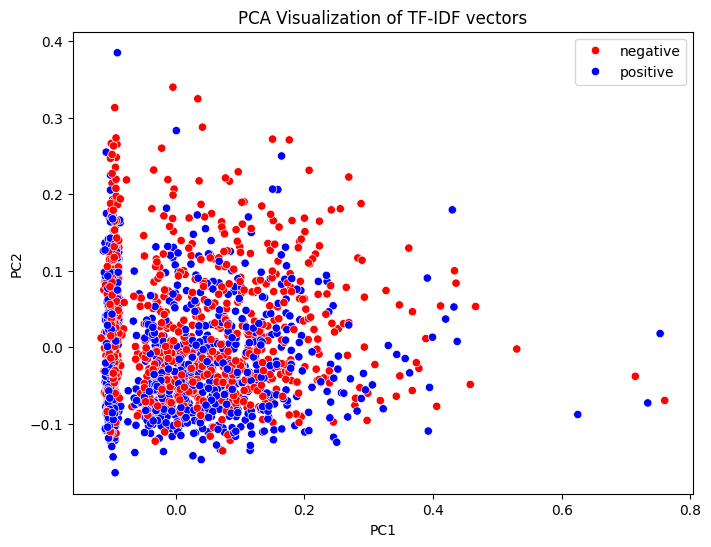

In [122]:
# Convert to ndarray and apply PCA
X_dense = np.asarray(X_train_tfidf[:2000].todense())
y_sample = y_train[:2000].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_sample, palette=["red", "blue"])
plt.title("PCA Visualization of TF-IDF vectors")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


##### 🔹 Step 3B: t-SNE for Better Separation (Optional, Slower)

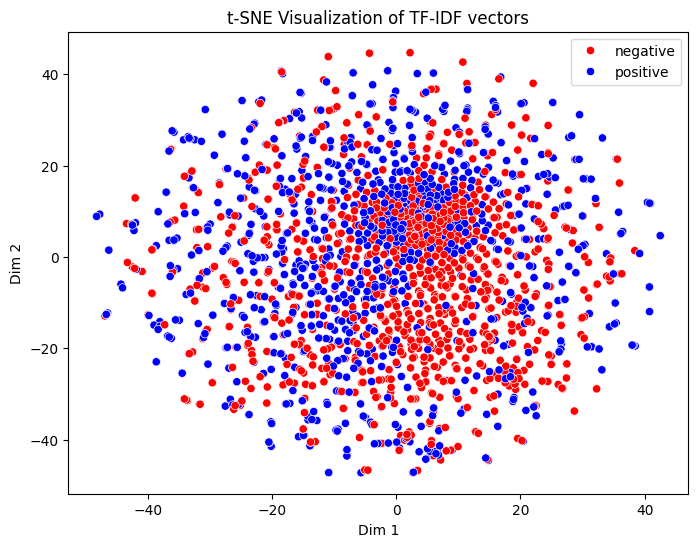

In [123]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_dense[:2000])  # Sample size for speed

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train[:2000].values, palette=["red", "blue"])
plt.title("t-SNE Visualization of TF-IDF vectors")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

🔍 Goal

### Instead of just plotting dots for reviews, we’ll:

    Project TF-IDF to 2D using PCA

    Extract top keywords per review (based on TF-IDF weights)

    Annotate points with those keywords

#### Step 1: Reduce to 2D (as before)

In [124]:
# Sample data
sample_size = 100
X_sample = X_train_tfidf[:sample_size]
reviews_sample = X_train[:sample_size]
labels_sample = y_train[:sample_size].values

# Convert to dense ndarray
X_dense = np.asarray(X_sample.todense())

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

#### Step 2: Get Feature (Word) Names

In [125]:
# Get feature (word) names from TF-IDF vectorizer
feature_names = tdfivectorizer.get_feature_names_out()
feature_names

array(['00', '000', '10', ..., 'zoom', 'zorro', 'zucco'],
      shape=(10000,), dtype=object)

#### Step 3: Extract Top N Keywords from Each Review Vector

In [126]:
def get_top_keywords(row_vector, top_n=2):
    sorted_indices = np.argsort(row_vector)[::-1]  # descending
    top_indices = sorted_indices[:top_n]
    return [feature_names[i] for i in top_indices if row_vector[i] > 0]


In [127]:
# Get top keywords for each review
keywords_list = [get_top_keywords(row) for row in X_dense]
keywords_text = [' '.join(words) for words in keywords_list]
keywords_list


[['nasa', 'airing'],
 ['vs', 'matches'],
 ['dating', 'thumbs'],
 ['ethnic', '1980'],
 ['br', 'prolonged'],
 ['martin', 'br'],
 ['staircase', 'travelling'],
 ['hackman', 'hill'],
 ['celebrities', 'private'],
 ['core', 'soft'],
 ['gun', 'goof'],
 ['vampire', 'crap'],
 ['son', 'fox'],
 ['episodes', 'hilarious'],
 ['drew', 'josie'],
 ['br', 'stinks'],
 ['eastwood', 'ladies'],
 ['double', 'standard'],
 ['cohen', 'tribute'],
 ['catch', 'king'],
 ['science', 'awards'],
 ['mummy', 'college'],
 ['gray', 'gary'],
 ['sirk', 'malone'],
 ['picture', 'suggestive'],
 ['miike', 'outside'],
 ['canadian', 'using'],
 ['series', 'book'],
 ['french', 'moves'],
 ['stop', 'act'],
 ['opera', 'master'],
 ['movie', 'style'],
 ['count', 'sets'],
 ['richard', 'sordid'],
 ['judy', 'pretty'],
 ['movie', 'relax'],
 ['family', 'rated'],
 ['astonishingly', 'association'],
 ['trier', 'dogma'],
 ['thrillers', 'br'],
 ['teachers', 'bus'],
 ['sale', 'comments'],
 ['mood', 'atmosphere'],
 ['macbeth', 'polanski'],
 ['basing

In [128]:
keywords_text

['nasa airing',
 'vs matches',
 'dating thumbs',
 'ethnic 1980',
 'br prolonged',
 'martin br',
 'staircase travelling',
 'hackman hill',
 'celebrities private',
 'core soft',
 'gun goof',
 'vampire crap',
 'son fox',
 'episodes hilarious',
 'drew josie',
 'br stinks',
 'eastwood ladies',
 'double standard',
 'cohen tribute',
 'catch king',
 'science awards',
 'mummy college',
 'gray gary',
 'sirk malone',
 'picture suggestive',
 'miike outside',
 'canadian using',
 'series book',
 'french moves',
 'stop act',
 'opera master',
 'movie style',
 'count sets',
 'richard sordid',
 'judy pretty',
 'movie relax',
 'family rated',
 'astonishingly association',
 'trier dogma',
 'thrillers br',
 'teachers bus',
 'sale comments',
 'mood atmosphere',
 'macbeth polanski',
 'basinger br',
 'reporter earthquake',
 'city perfect',
 'lowe killed',
 'hamilton early',
 'reminiscent details',
 'cliched fully',
 'kathy murdered',
 'southern south',
 'gay ride',
 'accident wrong',
 'csi sitcoms',
 'journey

#### Step 4: Visualize with Key words Annotated

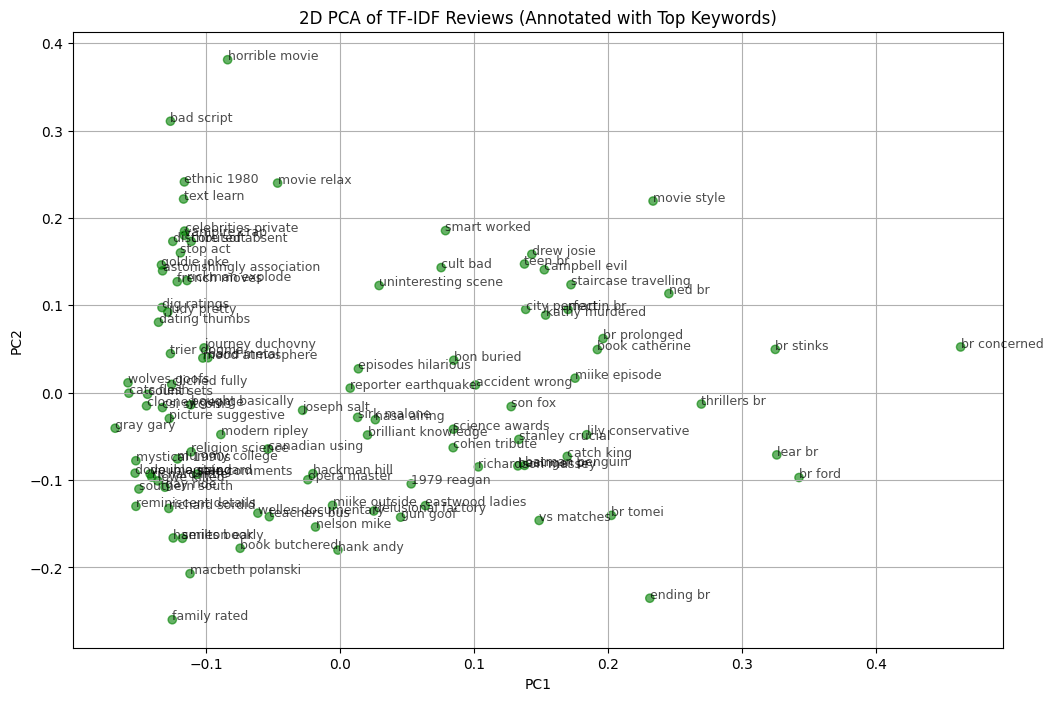

In [129]:
plt.figure(figsize=(12, 8))
colors = ['blue' if label == 0 else 'green' for label in labels_sample]

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6)

# Annotate each point with its keywords
for i, txt in enumerate(keywords_text):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=9, alpha=0.7)

plt.title("2D PCA of TF-IDF Reviews (Annotated with Top Keywords)")
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.legend()
plt.grid(True)
plt.show()
